# Aprendizagem de Máquina I - 2022/02

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `3n5aigg`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet

# Projeto 2

Este notebook é correspondente ao nosso segundo projeto, passado no dia 26/10/2022 e para entrega no dia 16/11/2022 (passível de negociação). Ele consiste em questões teóricas e questões práticas. A entrega da atividade deve ser feita através do Google Classroom, fazendo um upload deste notebook, devidamente atualizado com as suas resoluções e implementações. Recomendo fortemente que façam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente, e eu conseguir executar o código de vocês sem dificuldades (o uso de um *docker* ficará para outra edição do curso! Ainda estou aprendendo a usar certas tecnologias!)

A resolução das questões teóricas pode ser feita de duas formas:
* Escrita em $\LaTeX$ aqui no próprio Google Colab
* Escrita à mão, escaneada de modo legível, e feito o upload no Google Classroom.

A primeira alternativa é mais recomendada, por deixar o trabalho mais organizado, e cá entre nós, estar tudo em um documento só me facilita a correção! :-) mas para quem não tem fluência com $\LaTeX$ ou prefere fazer à mão, a segunda alternativa está aí. Obviamente que não haverá punição nenhuma meramente por conta da escolha de sua preferência.

### Questão T1

## Parte 01 - distâncias em alta dimensão

1) Gere um conjunto de $n$ observações, onde cada observação consiste de um vetor de $p$ atributos, sendo cada entrada uniformemente distribuída em $(0, 1)$. Controle separadamente $n$ e $p$, mantendo o primeiro fixo e variando o segundo. Chamaremos tal conjunto de dados de $\mathbb{X}$. Aqui queremos que $n$ e $p$ sejam quantidades compatíveis, ou seja, $n \approx p$.

In [ ]:
def gen_X(p, n_obs = 100):
  return np.random.rand(n_obs, p)

In [ ]:
X_2, X_5, X_10, X_50, X_100, X_1000 = gen_X(2), gen_X(5), gen_X(10), gen_X(50), gen_X(100), gen_X(1000)

2) Crie uma função que calcula a distância entre todos os pares distintos de observações geradas acima. Lembre-se que as observações são as *linhas* da matriz $\mathbb{X}$.

In [ ]:
def dist(X):
  list_dist = []

  for i in range(len(X)):
    for j in range(len(X)):
      if j > i:
        dist = np.linalg.norm(X[i] - X[j])
        list_dist.append(dist)

  return np.array(list_dist)

3) Faça histogramas das distâncias calculadas acima, à medida que $p$ cresce mas $n$ se mantém fixo. Qual conclusão é possível extrair do observado?

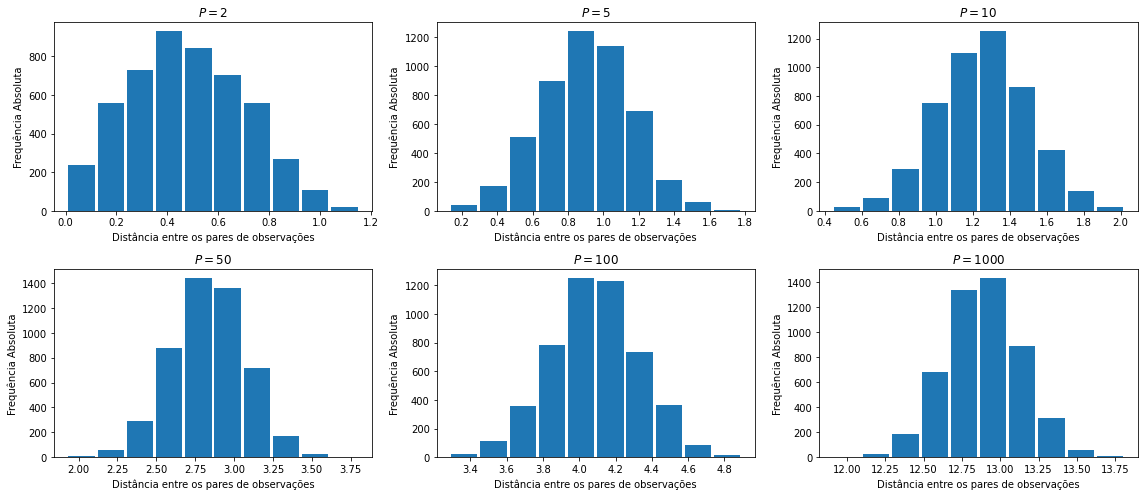

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(2, 3, 1)
plt.hist(dist(X_2), rwidth=0.9)
plt.title('$P = 2$')
plt.xlabel('Distância entre os pares de observações')
plt.ylabel('Frequência Absoluta')

plt.subplot(2, 3, 2)
plt.hist(dist(X_5), rwidth=0.9)
plt.title('$P = 5$')
plt.xlabel('Distância entre os pares de observações')
plt.ylabel('Frequência Absoluta')

plt.subplot(2, 3, 3)
plt.hist(dist(X_10), rwidth=0.9)
plt.title('$P = 10$')
plt.xlabel('Distância entre os pares de observações')
plt.ylabel('Frequência Absoluta')

plt.subplot(2, 3, 4)
plt.hist(dist(X_50), rwidth=0.9)
plt.title('$P = 50$')
plt.xlabel('Distância entre os pares de observações')
plt.ylabel('Frequência Absoluta')

plt.subplot(2, 3, 5)
plt.hist(dist(X_100), rwidth=0.9)
plt.title('$P = 100$')
plt.xlabel('Distância entre os pares de observações')
plt.ylabel('Frequência Absoluta')

plt.subplot(2, 3, 6)
plt.hist(dist(X_1000), rwidth=0.9)
plt.title('$P = 1000$')
plt.xlabel('Distância entre os pares de observações')
plt.ylabel('Frequência Absoluta')

plt.tight_layout()
plt.show()

### A menor distância entre os pontos vai aumentando conforme $p$ aumenta. Além disso, os pontos possuem distância similares entre si e vão ficando cada vez mais equidistantes.


4) Para corroborar a sua conclusão, calcule o *coeficiente de variação* de cada vetor de distâncias, variando $p$, e veja o que acontece. Lembremos que o coeficiente de variação de determinada quantidade é dado pelo desvio padrão dela dividido pela sua média. Qual conclusão é possível extrair do observado?

In [ ]:
# P = 2
coef_var_2 = np.std(dist(X_2))/np.mean(dist(X_2))
print(coef_var_2)

# P = 5
coef_var_5 = np.std(dist(X_5))/np.mean(dist(X_5))
print(coef_var_5)

# P = 10
coef_var_10 = np.std(dist(X_10))/np.mean(dist(X_10))
print(coef_var_10)

# P = 50
coef_var_50 = np.std(dist(X_50))/np.mean(dist(X_50))
print(coef_var_50)

# P = 100
coef_var_100 = np.std(dist(X_100))/np.mean(dist(X_100))
print(coef_var_100)

# P = 1000
coef_var_1000 = np.std(dist(X_1000))/np.mean(dist(X_1000))
print(coef_var_1000)

0.47143655095131093
0.2773377709792697
0.19524689388997046
0.08402171933180118
0.05940404882634475
0.018850003973665118


# Gráficos

## Gerando os Dados para os Gráficos

In [ ]:
eixo_x = np.linspace(1, 1000, num = 1000)
eixo_y = []

eixo_y_mean = []
eixo_y_std = []

for i in range(len(eixo_x)):
  X = gen_X(i)
  dist_x = dist(X)
  el_y = np.std(dist_x)/np.mean(dist_x)
  eixo_y.append(el_y)
  eixo_y_std.append(np.std(dist_x))
  eixo_y_mean.append(np.mean(dist_x))

eixo_y = np.array(eixo_y)
eixo_y_mean = np.array(eixo_y_mean)
eixo_y_std = np.array(eixo_y_std)

<ipython-input-7-f0aa7ef760fa>:10: RuntimeWarning: invalid value encountered in double_scalars
  el_y = np.std(dist_x)/np.mean(dist_x)


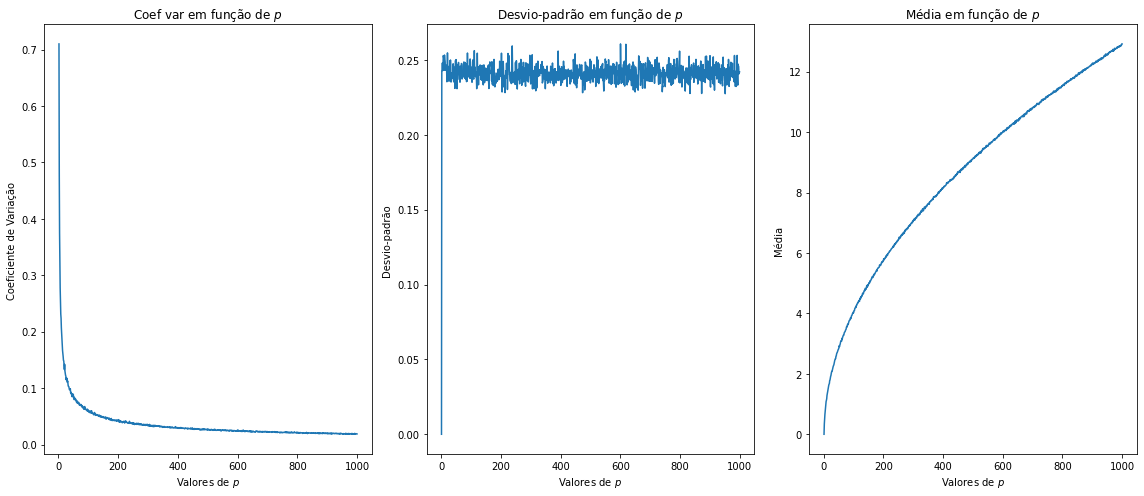

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
plt.plot(eixo_x, eixo_y)
plt.title('Coef var em função de $p$')
plt.xlabel('Valores de $p$')
plt.ylabel('Coeficiente de Variação ')

plt.subplot(1,3,2)
plt.plot(eixo_x, eixo_y_std)
plt.title('Desvio-padrão em função de $p$')
plt.xlabel('Valores de $p$')
plt.ylabel('Desvio-padrão ')

plt.subplot(1,3,3)
plt.title('Média em função de $p$')
plt.plot(eixo_x, eixo_y_mean)
plt.xlabel('Valores de $p$')
plt.ylabel('Média ')

plt.tight_layout()
plt.show()


### O coeficiente de variação vai diminuindo e se aproximando de 0, a medida que o valor de $p$ vai aumentando.

5) Estude, do ponto de vista teórico, a quantidade estimada no item 4) acima. Mais especificamente, denotando por $\mathbf{X}^{(i)}$ e $\mathbf{X}^{(j)}$ duas linhas distintas da matriz $\mathbb{X}$, ou seja, dois vetores independentes de observação, ambos de tamanho $p$, consistindo de entradas independentes e identicamente distribuídas com distribuição uniforme no intervalo $(0, 1)$, estude o que acontece com a quantidade abaixo, à medida que $p \to \infty$:
\begin{equation*}
\frac{\sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)}}{\mathbb{E}\left[\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right]}.
\end{equation*}
Relacione esse resultado com o comportamento observado no item 4) acima.

#Resposta

Vamos calcular o numerador e denominador da equação acima de forma separada,

Vamos denotar cada um dos elementos das linhas $i$ e $j$ da matriz $\mathbf{X}$, respectivamente por $ \mathbf{X}_{s}^{(i)}$ e $ \mathbf{X}_{s}^{(j)}$ com $ s \in \{1, ...p\}$

<br>

Cálculo do Numerador:

<br>

Temos que:

$ \sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)}  =
\sqrt{\mathbb{V}{\left[ \sum_{s=1}^{p}{\left(\mathbf{X}_{s}^{(i)} - \mathbf{X}_{s}^{(j)}\right )^2}\right]}} =
\sqrt{\sum_{s=1}^{p}{\mathbb{V} \left[ \left(\mathbf{X}_{s}^{(i)} - \mathbf{X}_{s}^{(j)}\right)^2 \right]}} $

<br>

Dado duas variáveis aleatórias $Z$ e $Z^{'}$, ambas com distribuição uniforme $[0,1]$ e independentes, que geram os valores de $\mathbf{X}_{s}^{(i)}$ e $\mathbf{X}_{s}^{(i)}$, podemos reescrever $\sqrt{\sum_{s=1}^{p}{\mathbb{V} \left[ \left(\mathbf{X}_{s}^{(i)} - \mathbf{X}_{s}^{(j)}\right)^2 \right]}} $ como:

<br>

$$  \sqrt{\sum_{s=1}^{p}{\mathbb{V}\left[\left(Z - Z^{'}\right)^2\right]}} = \begin{matrix} \sqrt{ \underbrace{ \mathbb{V}\left[\left(Z - Z^{'}\right)^2\right] + ... +\mathbb{V}\left[\left(Z - Z^{'}\right)^2\right]}  } \\ p \cdot \mathbb{V}\left[\left(Z - Z^{'}\right)^2\right] \end{matrix}  $$

<br>

Dessa forma,

$$\sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)} =   \sqrt{p \cdot \mathbb{V}\left[\left(Z - Z^{'}\right)^2\right]} $$

<br>

Vamos calcular:
<br>

$\mathbb{V}\left[\left(Z - Z^{'}\right)^2\right] = \mathbb{E}\left[\left(Z - Z^{'}\right)^4\right] - \left(\mathbb{E}\left[\left(Z - Z^{'}\right)^2\right]\right)^{2} $

<br>

Podemos usar o triangulo de pascal para achar os coeficientes da fatoração do termo $ \left(Z - Z^{'}\right)^4$ e do termo $\left(Z - Z^{'}\right)^2 $

<br>

$ \mathbb{V}\left[\left(Z - Z^{'}\right)^2\right] = \mathbb{E}\left[ Z^{4} - 4Z^{3}Z{'} + 6 Z^{2}Z^{'2} -4ZZ^{'3} + Z^{'4} \right] -  \left(\mathbb{E}\left[Z^{2} -2ZZ{'} + Z^{'2}\right]\right)^{2} $

<br>

Usando as propriedades da Esperança e calculando uma a uma, iremos ter:

$ \mathbb{V}\left[\left(Z - Z^{'}\right)^2\right] = \frac{1}{5} - \frac{1}{2} + \frac{2}{3} - \frac{1}{2} + \frac{1}{5} - \frac{1}{36} = \frac{105}{2700}  $

<br>

Achamos para o numerador o valor de:

$ \sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)} =   \sqrt{p \cdot \mathbb{V}\left[\left(Z - Z^{'}\right)^2\right]} = \sqrt{p \cdot \frac{105}{2700}} $

<br>

Cálculo do denominador:

<br>

$ \mathbb{E}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)  =
\mathbb{E}{\left[ \sum_{s=1}^{p}{\left(\mathbf{X}_{s}^{(i)} - \mathbf{X}_{s}^{(j)}\right )^2}\right]} =
\sum_{s=1}^{p}{\mathbb{E} \left[ \left(\mathbf{X}_{s}^{(i)} - \mathbf{X}_{s}^{(j)}\right)^2 \right]} $

<br>

Vamos usar a mesma intuição no cálculo do numerador. Iremos usar variáveis aleatórias com distribuição uniforme no intervalo $[0,1]$ para facilitar as contas

<br>

$$  \sum_{s=1}^{p}{\mathbb{E}\left[\left(Z - Z^{'}\right)^2\right]} = \begin{matrix} \underbrace{ \mathbb{E}\left[\left(Z - Z^{'}\right)^2\right] + ... +\mathbb{E}\left[\left(Z - Z^{'}\right)^2\right]}   \\ p \cdot \mathbb{E}\left[\left(Z - Z^{'}\right)^2\right] \end{matrix}  $$

Dessa forma,

<br>

$$ \sum_{s=1}^{p}{\mathbb{E}\left[\left(Z - Z^{'}\right)^2\right]} =  p \cdot \mathbb{E}\left[\left(Z - Z^{'}\right)^2\right] $$

<br>

Vamos calcular:

$\mathbb{E}\left[\left(Z - Z^{'}\right)^2\right] = \mathbb{E}\left(Z^{2} -2ZZ{'} + Z^{'2}\right)  $

<br>

Usando as propriedades da Esperança, temos que:

$  \mathbb{E}\left[\left(Z - Z^{'}\right)^2\right] = \frac{1}{3} - \frac{1}{2} + \frac{1}{3} = \frac{1}{6} $

<br>

Achamos para o numerador o valor de:

$ \mathbb{E}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right) =   p \cdot \mathbb{E}\left[\left(Z - Z^{'}\right)^2\right] = p \cdot \frac{1}{6} $

<br>

Logo,

\begin{equation*}
\frac{\sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)}}{\mathbb{E}\left[\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right]} = \frac{\sqrt{p \cdot \frac{105}{2700}}}{\frac{p}{6}} = \frac{6 \cdot \sqrt{p \cdot \frac{105}{2700}}}{p}
\end{equation*}

<br>

Agora podemos afirmar que se temos que $p \to \infty$. O coeficiente de variação $ \frac{\sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)}}{\mathbb{E}\left[\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right]} \to 0$

6) O que as conclusões deste experimento nos indicam sobre o uso do KNN em tais situações, ou seja, quando $n$ é "pequeno" e $p$ é "grande"?


### O KNN tem como parâmetro principal a distância entre os k-pontos mais próximos de $x$, para efetuar a regressão $r(x)$ . Quando temos $p$ grande e $n$ pequeno, a distância não é uma boa medida, pois como demonstramos acima, em altas dimensões os pontos ficam "quase" equidistantes entre si.

## Parte prática

### Questão P1

O objetivo dessa questão é continuar trabalhando na base de dados do Projeto 01 (https://www.kaggle.com/datasets/yasserh/song-popularity-dataset/) porém com as novas ferramentas que aprendemos nas últimas aulas.

Lembremos que queremos prever a popularidade de uma música a partir de certos atributos extraídos da mesma, e no Projeto 01 tratamos tal base utilizando métodos de regressão linear. Agora, o seu objetivo é usar árvores de regressão, *bagging*, florestas aleatórias e KNN para esta finalidade.

Lembremos também que no Projeto 01 nós trabalhamos somente com os atributos quantitativos, a saber:
* `song_duration_ms`
* `acousticness`
* `danceability`
* `energy`
* `instrumentalness`
* `liveness`
* `loudness`
* `speechiness`
* `audio_valence`

e descartamos os atributos qualitativos, a saber:
* `key` (tonalidade da música)
* `audio_mode` (se a música é estéreo ou mono)
* `time_signature`.

Atente ao fato que árvores de regressão (e portanto, *bagging* usando-a como classificador base e florestas aleatórias) são capazes de lidar com atributos qualitativos, de modo que para tais métodos podemos (e devemos!) considerar **todos** os atributos. O objetivo desta questão é, portanto, avaliar o desempenho de tais métodos e do KNN na base proposta, e comparar com o resultado obtido no Projeto 01.

Adicionalmente, há uma forma de transformar atributos qualitativos em quantitativos, através da técnica chamada `OneHotEncoder` (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Portanto, é possível incorporar os atributos qualitativos até no cenário de regressão linear e KNN. Caso queira, refaça o processamento proposto no Projeto 01, mas incorporando tais atributos, e veja se o resultado é melhor com a adição de tais atributos. Isso será um bônus na nota do projeto.



In [ ]:
# Importando os Dados

data_music = pd.read_csv("song_data.csv")
#data_music = pd.DataFrame.drop_duplicates(data_music)

# Removendo as variáveis explicativas qualitativas e variáveis de resposta
data_music_1 = data_music.drop(columns=['key', 'audio_mode', 'time_signature', 'tempo', 'song_popularity', 'song_name' ])
data_music_2 = data_music.drop(columns=['song_popularity', 'song_name'])

X_p1 = data_music_1.copy()  # Variáveis explicativas do Projeto 1
X_p2 = data_music_2.copy() # Variáveis explicativas do Projeto 2

y = data_music['song_popularity'].copy() # -> Variável de resposta

### Análise de músicas repetidas

In [ ]:
data_music['song_name'].value_counts()

Better                                            21
FEFE (feat. Nicki Minaj & Murda Beatz)            19
MIA (feat. Drake)                                 18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)    18
No Stylist                                        17
                                                  ..
Bassride                                           1
The Beat                                           1
We Are the Brave - Fatum Remix                     1
Long Live House Music                              1
Up to Me                                           1
Name: song_name, Length: 13070, dtype: int64

In [ ]:
filtro = data_music['song_name'] == 'Better'

data_music[filtro]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1524,Better,64,201250,0.5810,0.597,0.425,0.000000,2,0.100,-5.513,1,0.0295,119.998,4,0.309
3151,Better,95,229412,0.0984,0.442,0.585,0.391000,0,0.140,-10.332,0,0.0964,97.565,4,0.116
7182,Better,78,229412,0.0860,0.683,0.562,0.279000,0,0.120,-10.315,0,0.0605,98.027,4,0.149
7571,Better,44,229320,0.1020,0.695,0.586,0.317000,0,0.113,-10.315,0,0.0658,98.035,4,0.112
7626,Better,44,229320,0.1020,0.695,0.586,0.317000,0,0.113,-10.315,0,0.0658,98.035,4,0.112
8897,Better,78,229412,0.0860,0.683,0.562,0.279000,0,0.120,-10.315,0,0.0605,98.027,4,0.149
9949,Better,49,191996,0.0256,0.565,0.861,0.539000,4,0.363,-5.205,0,0.0658,159.975,4,0.738
10892,Better,44,229320,0.1020,0.695,0.586,0.317000,0,0.113,-10.315,0,0.0658,98.035,4,0.112
11760,Better,78,229412,0.0860,0.683,0.562,0.279000,0,0.120,-10.315,0,0.0605,98.027,4,0.149
12079,Better,1,207111,0.1550,0.574,0.689,0.000000,11,0.140,-6.512,1,0.0568,88.207,4,0.664


#### Ao analisar a música "Better" que aparece 21 vezes na base de dados, me atentei a diversos pontos interessantes e intrigantes:

* Temos para a música "Better" diferentes "Song_popularity", mas temos diferentes valores para outras variáveis explicativas como: "Song_duration_ms", "Acoustiness", "Danceability" e etc..

* A partir disso, fiz uma reflexão do porquê uma música com o mesmo nome possuir tantas variáveis explicativas diferentes e cheguei a conclusão de:

    * "Better" é uma palavra comum na lingua-inglesa e pode existir músicas com letras e/ou autores diferentes com esse nome
    
    * Podemos ter a música sendo gravada de diversas formas diferentes. Não entendo muito desse campo, mas "Better" pode ter a versão "ao-vivo", "acústica", "remix" e etc... Como não temos uma variável explicativa que nos informa de qual forma a música foi gravada, criei a suspeita de que todas as gravações diferentes foram desconsideras. Isso pode explicar as mudanças de valores em tantas variáveis explicativas.

Vale lembrar que esse padrão se repete não só com a música "Better", mas para diversas músicas repetidas na base de dados.

A partir desses pontos, decidi não remover as linhas repetidas na base de dados, pois elas vão ajudar nos métodos de regressão que iremos usar logo mais. No método KNN, por exemplo, linhas repetidas irá adicionar um "peso" no momento de fazer a média local.

In [ ]:
X_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  18835 non-null  int64  
 1   acousticness      18835 non-null  float64
 2   danceability      18835 non-null  float64
 3   energy            18835 non-null  float64
 4   instrumentalness  18835 non-null  float64
 5   liveness          18835 non-null  float64
 6   loudness          18835 non-null  float64
 7   speechiness       18835 non-null  float64
 8   audio_valence     18835 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [ ]:
X_p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  18835 non-null  int64  
 1   acousticness      18835 non-null  float64
 2   danceability      18835 non-null  float64
 3   energy            18835 non-null  float64
 4   instrumentalness  18835 non-null  float64
 5   key               18835 non-null  int64  
 6   liveness          18835 non-null  float64
 7   loudness          18835 non-null  float64
 8   audio_mode        18835 non-null  int64  
 9   speechiness       18835 non-null  float64
 10  tempo             18835 non-null  float64
 11  time_signature    18835 non-null  int64  
 12  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.9 MB


In [ ]:
y.value_counts(normalize = True)

58     0.021449
52     0.020653
55     0.020600
60     0.020334
63     0.020069
         ...   
98     0.002495
97     0.001911
93     0.001699
99     0.000849
100    0.000637
Name: song_popularity, Length: 101, dtype: float64

### Fazendo as predições usando o KNN

In [ ]:
X_tr_p1, X_tt_p1, y_tr_p1, y_tt_p1 = train_test_split(X_p1, y, test_size = 0.2)

In [ ]:
SS = StandardScaler()
KNN = KNeighborsRegressor()
Pipe_KNN = Pipeline(steps=[("Scaler", SS), ("KNN", KNN)])

param_grid_KNN = {"KNN__n_neighbors": [i for i in range(10, 500, 50)],
                  "KNN__weights": ['uniform', 'distance'],
                  "KNN__p": [1, 2]}

Pipe_KNNCV = GridSearchCV(Pipe_KNN, param_grid = param_grid_KNN, scoring='neg_mean_squared_error', cv = 5)
Pipe_KNNCV.fit(X_tr_p1, y_tr_p1)

print(Pipe_KNNCV.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN',
                 KNeighborsRegressor(n_neighbors=210, weights='distance'))])


In [ ]:
KNN_y_tr_pred = Pipe_KNNCV.predict(X_tr_p1)
KNN_y_tt_pred = Pipe_KNNCV.predict(X_tt_p1)

print('O MSE do KNN no conjunto de treino é:', MSE(KNN_y_tr_pred, y_tr_p1))
print('O MSE do KNN no conjunto de teste é:', MSE(KNN_y_tt_pred, y_tt_p1))

O MSE do KNN no conjunto de treino é: 6.0270078817298085
O MSE do KNN no conjunto de teste é: 304.04184890183353


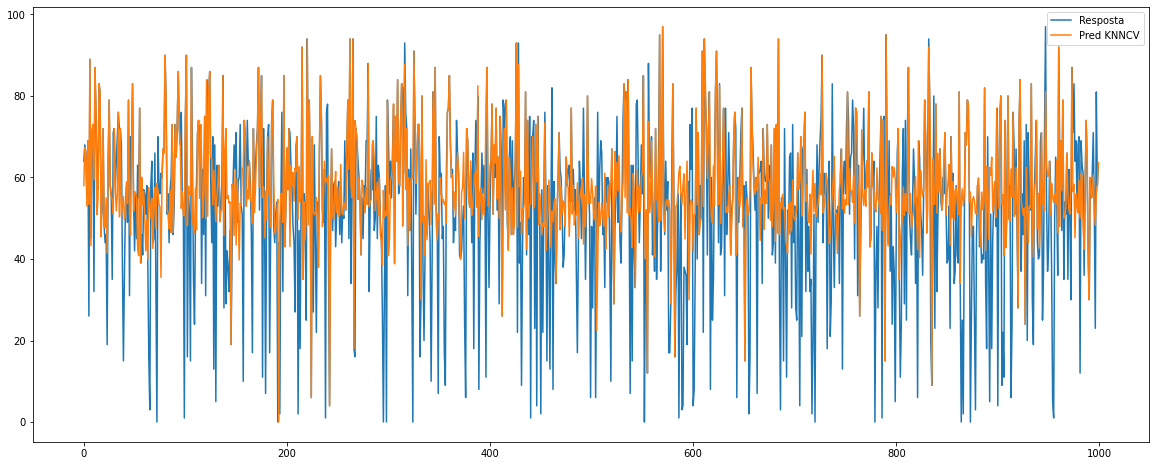

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_p1[:1000]), label = 'Resposta')
plt.plot(KNN_y_tt_pred[:1000], label = 'Pred KNNCV')
plt.legend()
plt.show()

### Fazendo as predições usando Árvores de Decisão

In [ ]:
X_tr_p2, X_tt_p2, y_tr_p2, y_tt_p2 = train_test_split(X_p2, y, test_size = 0.2)

In [ ]:
DTR = DecisionTreeRegressor()
param_grid_DTR = {"ccp_alpha": [0, 0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 1],
                  "criterion": ['squared_error', 'absolute_error']}

Pipe_DTRCV = GridSearchCV(DTR, param_grid = param_grid_DTR, scoring='neg_mean_squared_error', cv = 5)


Pipe_DTRCV.fit(X_tr_p2, y_tr_p2)
print(Pipe_DTRCV.best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.5)


In [ ]:
DTR_y_tr_pred = Pipe_DTRCV.predict(X_tr_p2)
DTR_y_tt_pred = Pipe_DTRCV.predict(X_tt_p2)

print('O MSE do DTR no conjunto de treino é:', MSE(DTR_y_tr_pred, y_tr_p2))
print('O MSE do DTR no conjunto de teste é:', MSE(DTR_y_tt_pred, y_tt_p2))

O MSE do DTR no conjunto de treino é: 394.8429429804213
O MSE do DTR no conjunto de teste é: 419.46392106844274


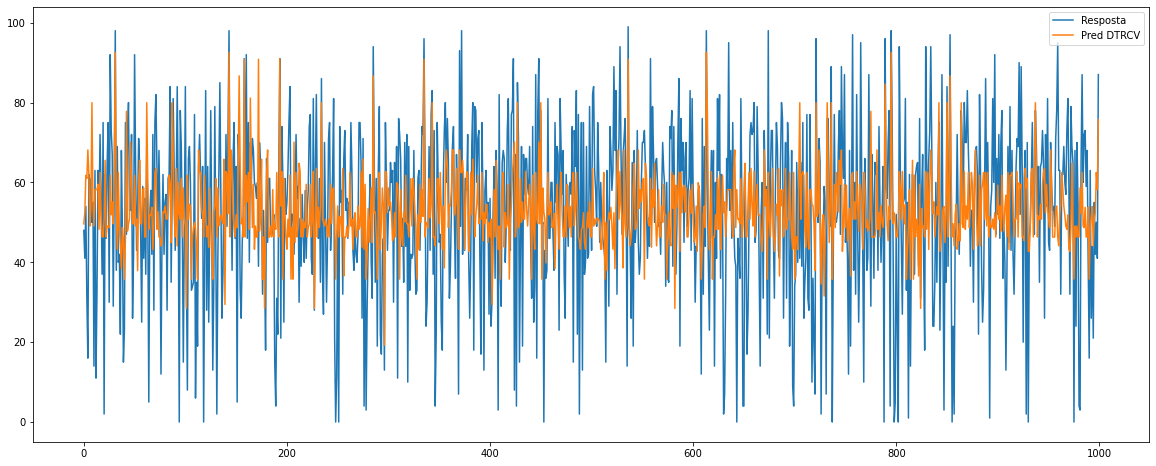

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_p2[:1000]), label = 'Resposta')
plt.plot(DTR_y_tt_pred[:1000], label = 'Pred DTRCV')
plt.legend()
plt.show()

### Usando Bagging no DecisionTreeRegressor

In [ ]:
DTRB = BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = 100)
param_grid_DTR = {"base_estimator__min_samples_leaf": [1, 3, 5, 10, 15, 20, 25, 50, 75, 100]}

Pipe_DTRBCV = GridSearchCV(DTRB, param_grid = param_grid_DTR, scoring='neg_mean_squared_error', cv = 5, n_jobs = -1)

Pipe_DTRBCV.fit(X_tr_p2, y_tr_p2)

print(Pipe_DTRBCV.best_estimator_)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)


In [ ]:
DTRB_y_tr_pred = Pipe_DTRBCV.predict(X_tr_p2)
DTRB_y_tt_pred = Pipe_DTRBCV.predict(X_tt_p2)

print('O MSE do DTRB no conjunto de treino é:', MSE(DTRB_y_tr_pred , y_tr_p2))
print('O MSE do DTRB no conjunto de teste é:', MSE(DTRB_y_tt_pred , y_tt_p2))

O MSE do DTRB no conjunto de treino é: 44.490718543740286
O MSE do DTRB no conjunto de teste é: 284.07712067708445


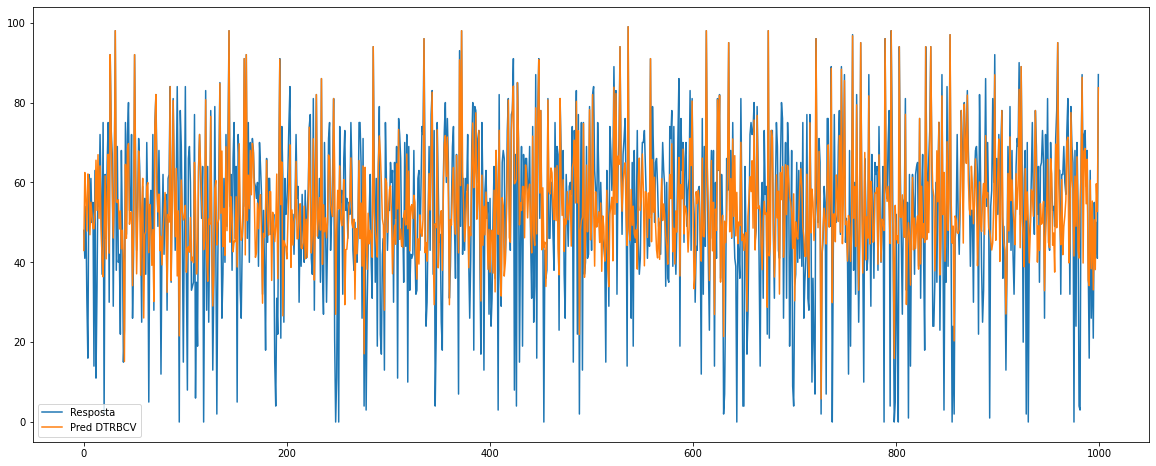

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_p2[:1000]), label = 'Resposta')
plt.plot(DTRB_y_tt_pred[:1000] , label = 'Pred DTRBCV')
plt.legend()
plt.show()

### Usando o Boosting

In [ ]:
Boost = GradientBoostingRegressor()

param_grid_Boost = {"learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 1],
                  "max_features": ['auto', 'sqrt', 'log2']}

Pipe_Boost = GridSearchCV(Boost, param_grid = param_grid_Boost, scoring='neg_mean_squared_error', cv = 5)

Pipe_Boost.fit(X_tr_p2, y_tr_p2)

print(Pipe_Boost.best_estimator_)

GradientBoostingRegressor(learning_rate=0.5, max_features='auto')


In [ ]:
Boost_y_tr_pred = Pipe_Boost.predict(X_tr_p2)
Boost_y_tt_pred = Pipe_Boost.predict(X_tt_p2)

print('O MSE do Boosting no conjunto de treino é:', MSE(Boost_y_tr_pred, y_tr_p2))
print('O MSE do Boosting no conjunto de teste é:', MSE(Boost_y_tt_pred, y_tt_p2))

O MSE do Boosting no conjunto de treino é: 323.30908455479374
O MSE do Boosting no conjunto de teste é: 395.02078035660736


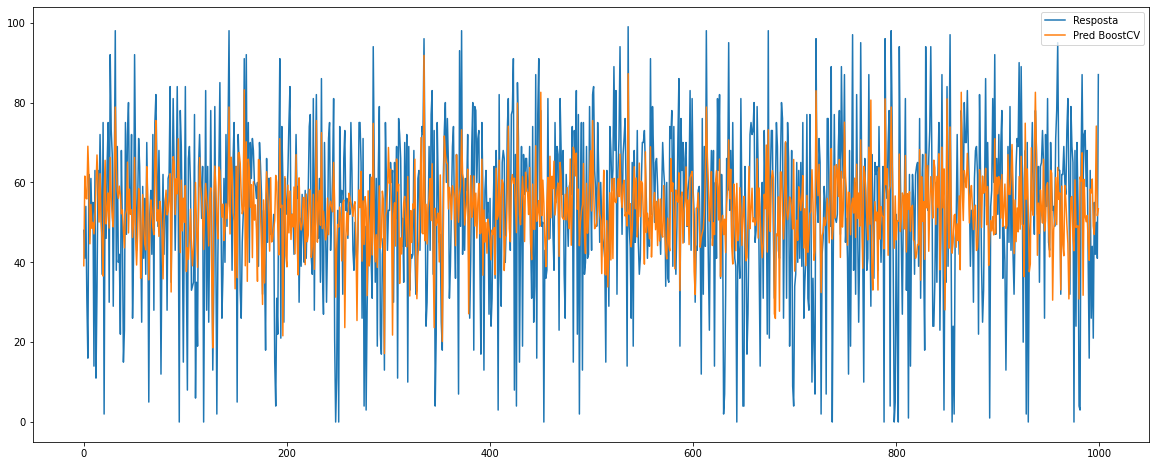

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_p2[:1000]), label = 'Resposta')
plt.plot(Boost_y_tt_pred[:1000], label = 'Pred BoostCV')
plt.legend()
plt.show()

### Usando Florestas Aleatórias

In [ ]:
RFR = RandomForestRegressor(n_estimators = 100,
                            bootstrap = True,
                            oob_score = True)

param_grid_RFR = {"max_features": ['sqrt', 'log2', None]}

Pipe_RFRCV = GridSearchCV(RFR, param_grid = param_grid_RFR, scoring='neg_mean_squared_error', cv = 5)

Pipe_RFRCV.fit(X_tr_p2, y_tr_p2)

print(Pipe_RFRCV.best_estimator_)

RandomForestRegressor(max_features='log2', oob_score=True)


In [ ]:
RFR_y_tr_pred = Pipe_RFRCV.predict(X_tr_p2)
RFR_y_tt_pred = Pipe_RFRCV.predict(X_tt_p2)

print('O MSE do RFR no conjunto de treino é:', MSE(RFR_y_tr_pred, y_tr_p2))
print('O MSE do RFR no conjunto de teste é:', MSE(RFR_y_tt_pred, y_tt_p2))

O MSE do RFR no conjunto de treino é: 44.444155438596454
O MSE do RFR no conjunto de teste é: 281.37502282730776


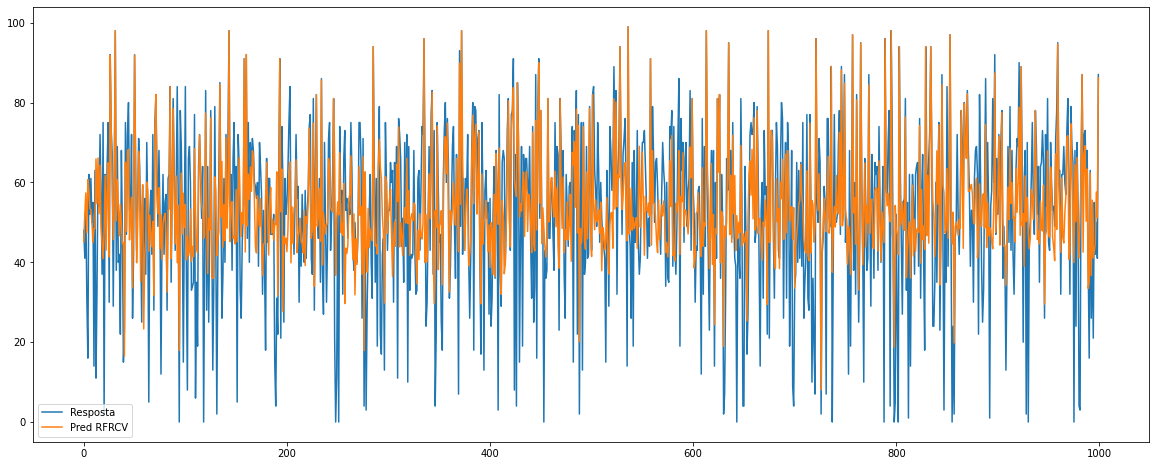

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_p2[:1000]), label = 'Resposta')
plt.plot(RFR_y_tt_pred[:1000], label = 'Pred RFRCV')
plt.legend()
plt.show()

## Gráfico comparando todos os métodos que utilizei até aqui

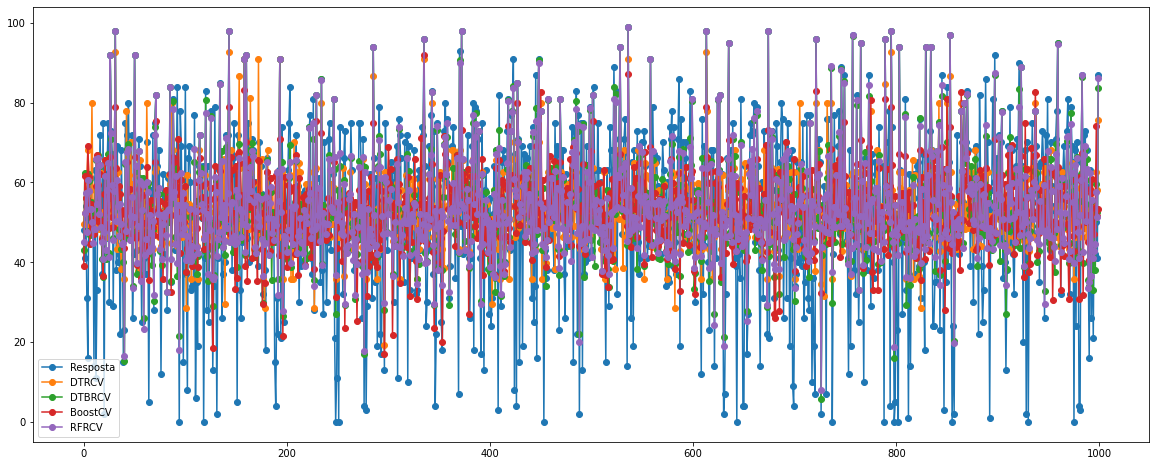

In [ ]:
fig = plt.figure(figsize=(20,8))

plt.plot(np.array(y_tt_p2[:1000]), 'o-', label = 'Resposta')
plt.plot(DTR_y_tt_pred[:1000], 'o-', label = 'DTRCV')
plt.plot(DTRB_y_tt_pred[:1000], 'o-', label = 'DTBRCV')
plt.plot(Boost_y_tt_pred[:1000],'o-', label = 'BoostCV')
plt.plot(RFR_y_tt_pred[:1000], 'o-', label = 'RFRCV')
plt.legend()
plt.show()

## Parte II do Projeto:

- Usar o OneHotEnconder para a transformação de variáveis qualitativas
- Comparar os resultados dos métodos de predição com e sem OneHotEnconder


### Usando o OneHotEncoder para transformar as variáveis qualitativas em quantitativas

In [ ]:
vars_qualitativas = ['key', 'audio_mode', 'time_signature' ]

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    vars_qualitativas),
    remainder='passthrough')

X_ohe = one_hot_enc.fit_transform(X_p2)
X_ohe = pd.DataFrame(X_ohe, columns=one_hot_enc.get_feature_names_out())
X_ohe

,onehotencoder__key_0,onehotencoder__key_1,onehotencoder__key_2,onehotencoder__key_3,onehotencoder__key_4,onehotencoder__key_5,onehotencoder__key_6,onehotencoder__key_7,onehotencoder__key_8,onehotencoder__key_9,...,remainder__song_duration_ms,remainder__acousticness,remainder__danceability,remainder__energy,remainder__instrumentalness,remainder__liveness,remainder__loudness,remainder__speechiness,remainder__tempo,remainder__audio_valence
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159645.0,0.893000,0.500,0.151,0.000065,0.1110,-16.107,0.0348,113.969,0.300
18831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,205666.0,0.765000,0.495,0.161,0.000001,0.1050,-14.078,0.0301,94.286,0.265
18832,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,182211.0,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,130.534,0.286
18833,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,352280.0,0.945000,0.488,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323


In [ ]:
X_tr_ohe, X_tt_ohe, y_tr_ohe, y_tt_ohe = train_test_split(X_ohe, y, test_size = 0.2)

### Testando o método do KNN com Variáveis qualitativas

In [ ]:
KNN = KNeighborsRegressor()
Pipe_KNN = Pipeline(steps=[("Scaler", SS), ("KNN", KNN)])


param_grid_KNN = {"KNN__n_neighbors": [10, 100, 200, 500, 1000, 1500, 2000],
                  "KNN__weights": ['uniform', 'distance'],
                  "KNN__p": [1, 2]}

Pipe_KNNCV = GridSearchCV(Pipe_KNN, param_grid = param_grid_KNN, scoring='neg_mean_squared_error', cv = 5)
Pipe_KNNCV.fit(X_tr_ohe, y_tr_ohe)

print(Pipe_KNNCV.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN',
                 KNeighborsRegressor(n_neighbors=1500, weights='distance'))])


In [ ]:
KNN_y_tr_pred_ohe = Pipe_KNNCV.predict(X_tr_ohe)
KNN_y_tt_pred_ohe = Pipe_KNNCV.predict(X_tt_ohe)

print('O MSE do KNN_Ohe no conjunto de treino é:', MSE(KNN_y_tr_pred_ohe, y_tr_ohe))
print('O MSE do KNN_Ohe no conjunto de teste é:', MSE(KNN_y_tt_pred_ohe, y_tt_ohe))

O MSE do KNN_Ohe no conjunto de treino é: 6.025174061700013
O MSE do KNN_Ohe no conjunto de teste é: 318.9312372748592


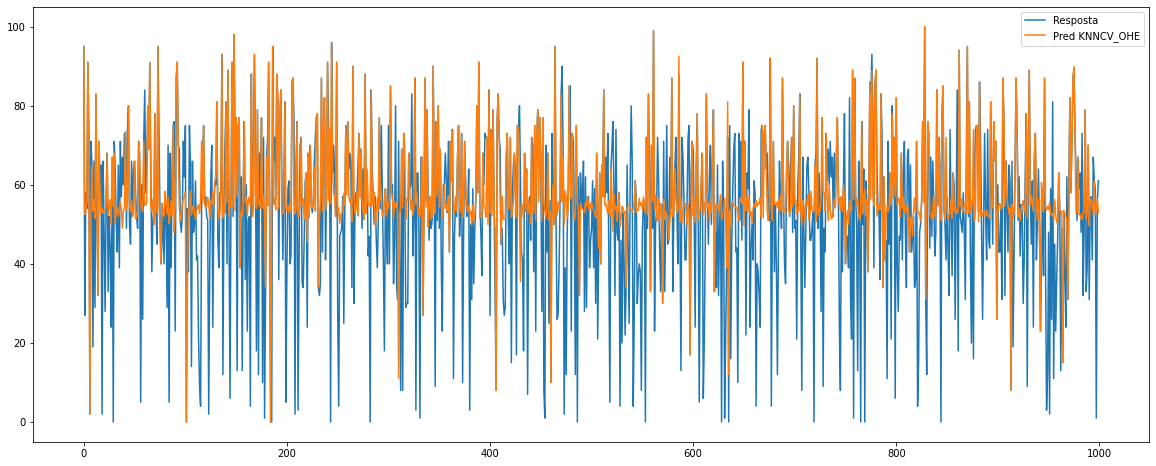

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_ohe[:1000]), label = 'Resposta')
plt.plot(KNN_y_tt_pred_ohe[:1000], label = 'Pred KNNCV_OHE')
plt.legend()
plt.show()

## Recapitulando o Projeto 1

Irei pegar os método RidgeCV e ElasticNETCV do meu projeto 1 e farei as predições com e sem as variáveis qualitativas

### RidgeCV Sem variáveis qualitativas

In [ ]:
rid = Ridge()

pipe_rid = Pipeline(steps=[("Scaler", SS), ("Ridge", rid)])
param_grid_rid = {"Ridge__alpha": [0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]}

pipe_ridCV = GridSearchCV(pipe_rid, param_grid = param_grid_rid, scoring = 'neg_mean_squared_error', cv = 5)

pipe_ridCV.fit(X_tr_p1, y_tr_p1)

y_tr_pred_ridCV = pipe_ridCV.predict(X_tr_p1)
y_tt_pred_ridCV = pipe_ridCV.predict(X_tt_p1)

print(pipe_ridCV.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge(alpha=100))])


In [ ]:
print('RidgeCV: MSE no conjunto de treino', MSE(y_tr_p1, y_tr_pred_ridCV))
print('RidgeCV: MSE no conjunto de teste', MSE(y_tt_p1, y_tt_pred_ridCV))

RidgeCV: MSE no conjunto de treino 460.4940374873847
RidgeCV: MSE no conjunto de teste 448.3531288163606


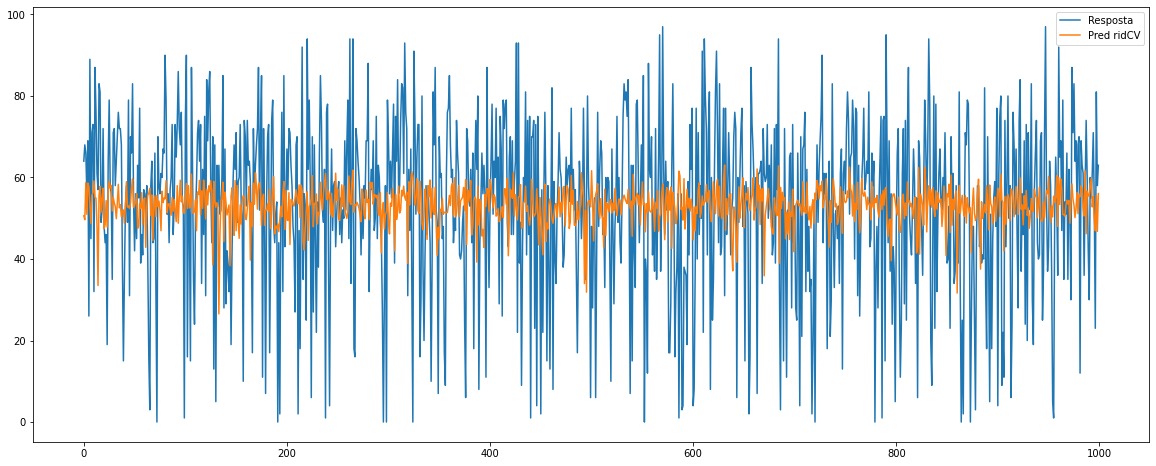

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_p1[:1000]), label = 'Resposta')
plt.plot(y_tt_pred_ridCV[:1000], label = 'Pred ridCV')
plt.legend()
plt.show()

### RidgeCV Com variáveis qualitativas

In [ ]:
rid_ohe = Ridge()
pipe_rid_ohe = Pipeline(steps=[("Scaler", SS), ("Ridge", rid_ohe)])

param_grid_rid_ohe = {"Ridge__alpha": [0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]}

pipe_ridCV_ohe = GridSearchCV(pipe_rid_ohe, param_grid = param_grid_rid_ohe, scoring = 'neg_mean_squared_error', cv = 5)

pipe_ridCV_ohe.fit(X_tr_ohe, y_tr_ohe)

y_tr_pred_ridCV_ohe = pipe_ridCV_ohe.predict(X_tr_ohe)
y_tt_pred_ridCV_ohe = pipe_ridCV_ohe.predict(X_tt_ohe)

print(pipe_ridCV_ohe.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge(alpha=100))])


In [ ]:
print('RidgeCV_Ohe: MSE no conjunto de treino', MSE(y_tr_ohe, y_tr_pred_ridCV_ohe))
print('RidgeCV_Ohe: MSE no conjunto de teste', MSE(y_tt_ohe, y_tt_pred_ridCV_ohe))

RidgeCV_Ohe: MSE no conjunto de treino 455.53531768994804
RidgeCV_Ohe: MSE no conjunto de teste 460.1042029354694


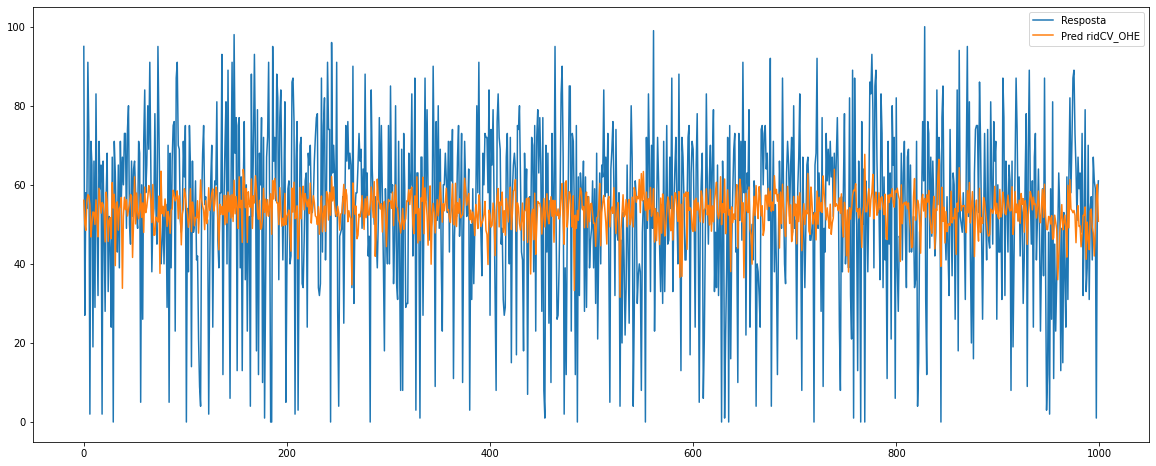

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_ohe[:1000]), label = 'Resposta')
plt.plot(y_tt_pred_ridCV_ohe[:1000], label = 'Pred ridCV_OHE')
plt.legend()
plt.show()

### ElasticNetCV sem variáveis qualitativas

In [ ]:
elanet = ElasticNet()

pipe_elanet = Pipeline(steps=[("Scaler", SS), ("ElasticNet", elanet)])

param_grid_elanet = {"ElasticNet__alpha": [0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000],
                     "ElasticNet__l1_ratio": [0.001, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

pipe_elanetCV = GridSearchCV(pipe_elanet, param_grid = param_grid_elanet, scoring = 'neg_mean_squared_error', cv = 5)

pipe_elanetCV.fit(X_tr_p1, y_tr_p1)

print(pipe_elanetCV.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('ElasticNet', ElasticNet(alpha=0.01, l1_ratio=0.001))])


In [ ]:
y_tr_pred_elanetCV = pipe_elanetCV.predict(X_tr_p1)
y_tt_pred_elanetCV = pipe_elanetCV.predict(X_tt_p1)

print('ElasticNetCV: MSE no conjunto de treino', MSE(y_tr_p1, y_tr_pred_elanetCV))
print('ElasticNetCV: MSE no conjunto de teste', MSE(y_tt_p1, y_tt_pred_elanetCV))

ElasticNetCV: MSE no conjunto de treino 460.4973072699708
ElasticNetCV: MSE no conjunto de teste 448.3538399896219


### ElasticNetCV com variáveis qualitativas

In [ ]:
elanet_ohe = ElasticNet()
pipe_elanet_ohe = Pipeline(steps=[("Scaler", SS), ("ElasticNet", elanet_ohe)])

param_grid_elanet = {"ElasticNet__alpha": [ 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000],
                     "ElasticNet__l1_ratio": [ 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

pipe_elanetCV_ohe = GridSearchCV(pipe_elanet_ohe, param_grid = param_grid_elanet, scoring = 'neg_mean_squared_error', cv = 5)

pipe_elanetCV_ohe.fit(X_tr_ohe, y_tr_ohe)

print(pipe_elanetCV_ohe.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('ElasticNet', ElasticNet(alpha=0.05, l1_ratio=0.9))])


In [ ]:
y_tr_pred_elanetCV_ohe = pipe_elanetCV_ohe.predict(X_tr_ohe)
y_tt_pred_elanetCV_ohe = pipe_elanetCV_ohe.predict(X_tt_ohe)

print('ElasticNetCV_Ohe: MSE no conjunto de treino', MSE(y_tr_ohe, y_tr_pred_elanetCV_ohe))
print('ElasticNetCV_Ohe: MSE no conjunto de teste', MSE(y_tt_ohe, y_tt_pred_elanetCV_ohe))

ElasticNetCV_Ohe: MSE no conjunto de treino 455.6089934545211
ElasticNetCV_Ohe: MSE no conjunto de teste 460.20675436343606


## Gráfico para os Modelos com OneHotEncoder

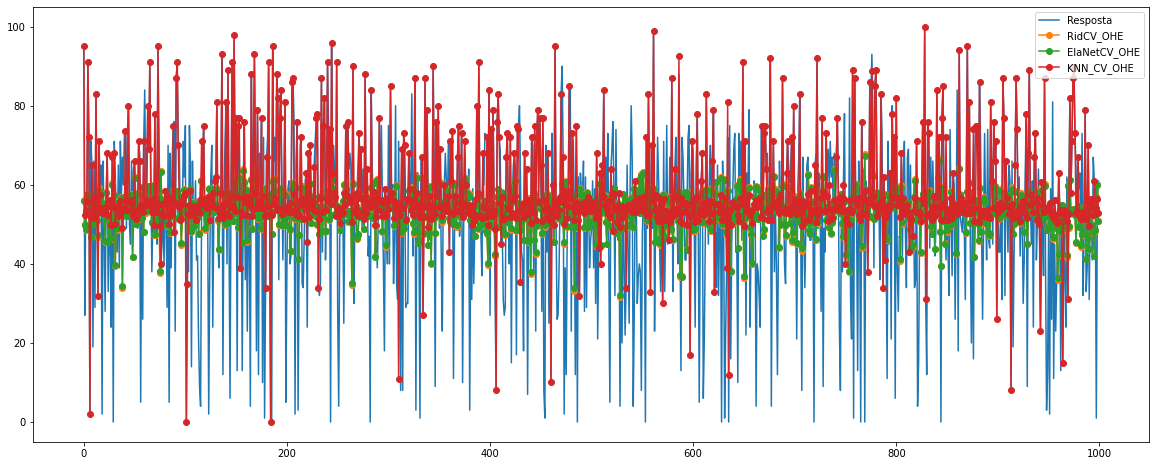

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_ohe[:1000]), label = 'Resposta')
plt.plot(y_tt_pred_ridCV_ohe[:1000], 'o-', label = 'RidCV_OHE')
plt.plot(y_tt_pred_elanetCV_ohe[:1000], 'o-', label = 'ElaNetCV_OHE')
plt.plot(KNN_y_tt_pred_ohe[:1000], 'o-', label = 'KNN_CV_OHE')
plt.legend()

## Gráfico para os Modelos sem OneHotEncoder

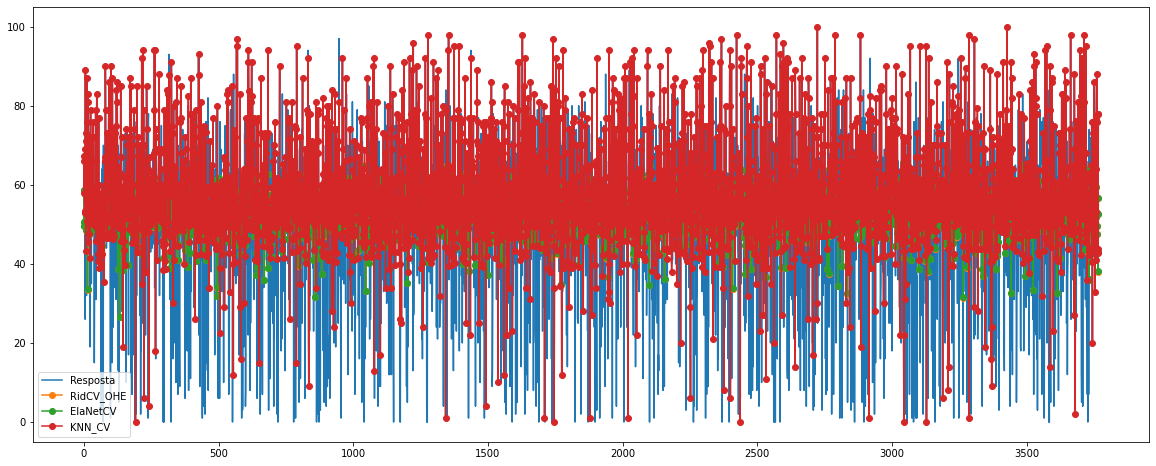

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.array(y_tt_p1), label = 'Resposta')
plt.plot(y_tt_pred_ridCV, 'o-', label = 'RidCV_OHE')
plt.plot(y_tt_pred_elanetCV, 'o-', label = 'ElaNetCV')
plt.plot(KNN_y_tt_pred, 'o-', label = 'KNN_CV')
plt.legend()
plt.show()

## MSE no conjunto de teste para todos os métodos que fizemos predições

In [ ]:
print('O MSE do KNN no conjunto de teste é:',       MSE(KNN_y_tt_pred, y_tt_p1))
print('')
print('O MSE do DTR no conjunto de teste é:',       MSE(DTR_y_tt_pred, y_tt_p2))
print('')
print('O MSE do DTRB no conjunto de teste é:',      MSE(DTRB_y_tt_pred, y_tt_p2))
print('')
print('O MSE do Boosting no conjunto de teste é:',      MSE(Boost_y_tt_pred, y_tt_p2))
print('')
print('O MSE do RFR no conjunto de teste é:',       MSE(RFR_y_tt_pred, y_tt_p2))
print('')
print('O MSE do KNN_Ohe no conjunto de teste é:',   MSE(KNN_y_tt_pred_ohe, y_tt_ohe))
print('')
print('RidgeCV: MSE no conjunto de teste',          MSE(y_tt_pred_ridCV, y_tt_p1))
print('')
print('RidgeCV_Ohe: MSE no conjunto de teste',      MSE(y_tt_pred_ridCV_ohe, y_tt_ohe,))
print('')
print('ElasticNetCV: MSE no conjunto de teste',     MSE(y_tt_pred_elanetCV, y_tt_p1))
print('')
print('ElasticNetCV_Ohe: MSE no conjunto de teste', MSE(y_tt_pred_elanetCV_ohe, y_tt_ohe))

O MSE do KNN no conjunto de teste é: 304.04184890183353

O MSE do DTR no conjunto de teste é: 419.46392106844274

O MSE do DTRB no conjunto de teste é: 284.07712067708445

O MSE do Boosting no conjunto de teste é: 395.02078035660736

O MSE do RFR no conjunto de teste é: 281.37502282730776

O MSE do KNN_Ohe no conjunto de teste é: 318.9312372748592

RidgeCV: MSE no conjunto de teste 448.3531288163606

RidgeCV_Ohe: MSE no conjunto de teste 460.1042029354694

ElasticNetCV: MSE no conjunto de teste 448.3538399896219

ElasticNetCV_Ohe: MSE no conjunto de teste 460.20675436343606


## Conclusão final

- Os dois métodos que resultaram no menor MSE foi o DecisionTreeRegressor com Bagging e Random Florest.

- Usar as variáveis qualitativas a partir do One Hot Enconder não diminuiu o MSE nos métodos utilizados no projeto 1 e também não reduziu o MSE no KNN.